In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/fHomeC.csv")
df

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.40,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.40,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.40,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.40,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1451634395,1.076717,0.002700,1.076717,0.000000,0.020567,0.064833,0.187883,0.004883,0.006800,...,9.9,Clear,10.88,1023.89,5.04,0,9.0,0.0,11.93,0.0
9996,1451634396,1.100200,0.002783,1.100200,0.000017,0.020733,0.136833,0.178600,0.004950,0.007100,...,9.9,Clear,10.88,1023.89,5.04,0,9.0,0.0,11.93,0.0
9997,1451634397,1.173883,0.002850,1.173883,0.000000,0.020833,0.184250,0.181117,0.004967,0.006850,...,9.9,Clear,10.88,1023.89,5.04,0,9.0,0.0,11.93,0.0
9998,1451634398,1.770817,0.002700,1.770817,0.000067,0.021900,0.658733,0.185300,0.005217,0.007217,...,9.9,Clear,10.88,1023.89,5.04,0,9.0,0.0,11.93,0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load your dataset into a DataFrame
# Assuming you have a DataFrame named 'df' with the data

# Encode categorical variables
label_encoder = LabelEncoder()
df['icon'] = label_encoder.fit_transform(df['icon'])
df['summary'] = label_encoder.fit_transform(df['summary'])

# Create a binary target variable 'precipitation' based on 'precipProbability'
df['spam'] = np.where(df['precipProbability'] > 0, 1, 0)

# Fill missing values for numeric columns with the mean
numeric_columns = df.select_dtypes(include=[float, int]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Define your features (X) and binary target variable (y)
X = df[['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
        'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
        'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
        'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
        'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
        'humidity', 'visibility', 'apparentTemperature',
        'pressure', 'windSpeed', 'windBearing', 'precipIntensity',
        'dewPoint', 'precipProbability']]

y = df['spam']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")


Accuracy: 0.989
Confusion Matrix:
[[1978    0]
 [  22    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1978
           1       0.00      0.00      0.00        22

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.98      0.99      0.98      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df[['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
        'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
        'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
        'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
        'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
        'humidity', 'visibility', 'apparentTemperature',
        'pressure', 'windSpeed', 'windBearing', 'precipIntensity',
        'dewPoint', 'precipProbability']]
y = df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

Accuracy: 1.0
Confusion Matrix:
[[1978    0]
 [   0   22]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1978
           1       1.00      1.00      1.00        22

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
X = df[['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
        'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
        'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
        'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
        'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
        'humidity', 'visibility', 'apparentTemperature',
        'pressure', 'windSpeed', 'windBearing', 'precipIntensity',
        'dewPoint', 'precipProbability']]
y = df['spam']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_encoded = knn_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
accuracy = accuracy_score(y_test, y_pred_encoded)
confusion = confusion_matrix(y_test, y_pred_encoded)
report = classification_report(y_test, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9965
Confusion Matrix:
[[1975    3]
 [   4   18]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1978
           1       0.86      0.82      0.84        22

    accuracy                           1.00      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
#decision tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df[['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
        'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
        'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
        'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
        'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
        'humidity', 'visibility', 'apparentTemperature',
        'pressure', 'windSpeed', 'windBearing', 'precipIntensity',
        'dewPoint', 'precipProbability']]
y = df['spam']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_encoded = decision_tree_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
accuracy = accuracy_score(y_test, y_pred_encoded)
confusion = confusion_matrix(y_test, y_pred_encoded)
report = classification_report(y_test, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

Accuracy: 1.0
Confusion Matrix:
[[1978    0]
 [   0   22]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1978
           1       1.00      1.00      1.00        22

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
#Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_encoded = naive_bayes_model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_test, y_pred_encoded)
confusion = confusion_matrix(y_test, y_pred_encoded)
report = classification_report(y_test, y_pred_encoded)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

Accuracy: 1.0
Confusion Matrix:
[[1978    0]
 [   0   22]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1978
           1       1.00      1.00      1.00        22

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



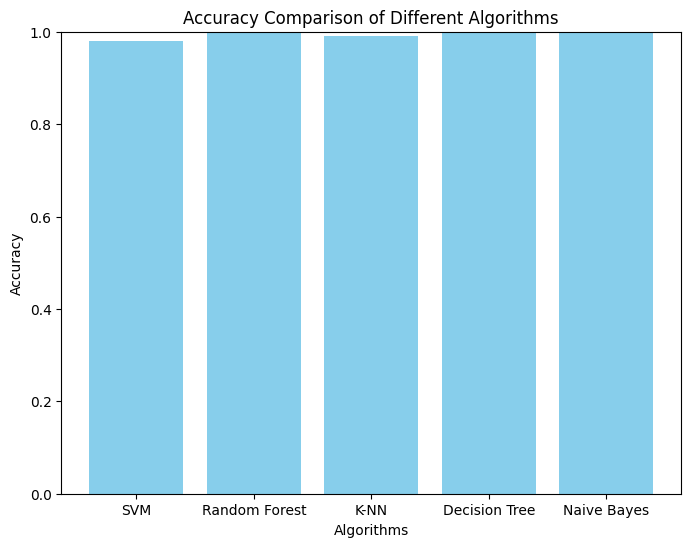

In [1]:
import matplotlib.pyplot as plt

# Sample list of accuracies (replace this with your derived accuracies)
accuracies = [0.98,1.0,0.99,1.0,1.0]

# Sample labels for the x-axis (e.g., different algorithms or iterations)
labels = ['SVM', 'Random Forest', 'K-NN','Decision Tree' ,'Naive Bayes']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color='skyblue')

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')

# Show the bar chart
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 (assuming accuracy is between 0 and 1)
plt.show()
